In [1]:
import pandas as pd
import numpy as np

ad_data = pd.read_csv('advertising.csv')
ad_data
type(ad_data)

pandas.core.frame.DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

no_na_ad = ad_data.dropna
ad_data_np = np.array(no_na_ad)
type(ad_data_np)

numpy.ndarray

In [3]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
import scipy.stats as stats

ad_data.describe()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


time spent on site and daily internet usage is likely in minutes
area income is likely in thousands $


In [6]:
np.unique(ad_data['Country'])
np.unique(ad_data['Ad Topic Line'])
print()

In [7]:
ad_data_usage = ad_data.groupby(['Male'])['Daily Internet Usage'].mean()
ad_data_usage


Male
0    178.816763
1    181.276923
Name: Daily Internet Usage, dtype: float64

In [8]:
ad_data_where = ad_data['Country'].value_counts()
ad_data_where

France                                                 9
Czech Republic                                         9
Senegal                                                8
South Africa                                           8
Cyprus                                                 8
                                                      ..
Bermuda                                                1
Kiribati                                               1
Saint Kitts and Nevis                                  1
Montserrat                                             1
British Indian Ocean Territory (Chagos Archipelago)    1
Name: Country, Length: 237, dtype: int64

In [9]:
ad_data_city = ad_data['City'].value_counts()
ad_data_city

Williamsport         3
Lisamouth            3
Robertfurt           2
East Timothy         2
North Daniel         2
                    ..
Luisfurt             1
North Monicaville    1
Zacharystad          1
East Breannafurt     1
Reginamouth          1
Name: City, Length: 969, dtype: int64

In [10]:
ad_data_click = ad_data['Clicked on Ad'].value_counts()
ad_data_click

1    500
0    500
Name: Clicked on Ad, dtype: int64

Vis ideas:
boxplot of daily internet usage per male/female (center, spread, outliers)
heatmap --> wont work with strings (e.g. ad topic line)
map with locations pinpointed (click yes or no)
something with timestamp


<AxesSubplot:xlabel='Daily Time Spent on Site'>

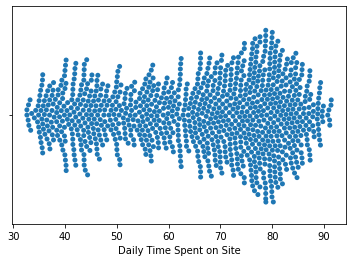

In [11]:
sns.swarmplot(x = ad_data['Daily Time Spent on Site'])

<AxesSubplot:xlabel='Daily Internet Usage'>

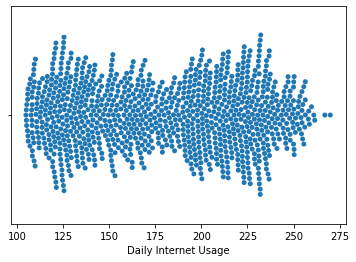

In [12]:
sns.swarmplot(x = ad_data['Daily Internet Usage'])

<AxesSubplot:xlabel='Daily Internet Usage', ylabel='Daily Time Spent on Site'>

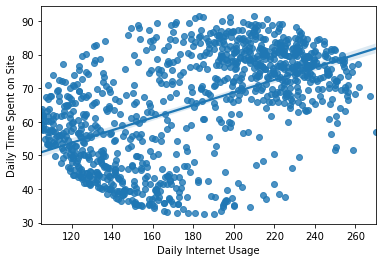

In [13]:
sns.regplot(data = ad_data, x = 'Daily Internet Usage', y = 'Daily Time Spent on Site')

<AxesSubplot:xlabel='Age'>

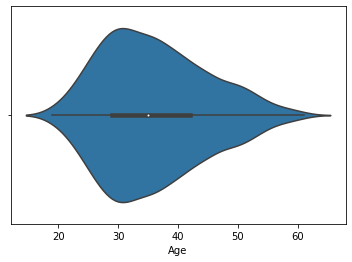

In [14]:
sns.violinplot(data = ad_data, x= 'Age')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Time Spent on Site'>

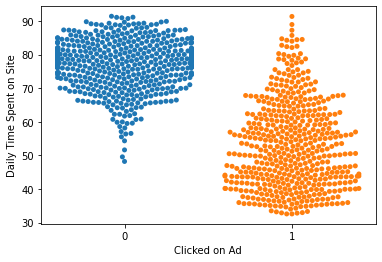

In [15]:
sns.swarmplot(data = ad_data, x= ad_data['Clicked on Ad'], y = ad_data['Daily Time Spent on Site'])

### TTS Before PreProcessing Anything to Prevent Data Leakage

In [11]:
from sklearn.model_selection import train_test_split

columns = ['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp']
x = ad_data[columns]
y = ad_data['Clicked on Ad']

x_train, x_test, y_train, y_test = train_test_split(ad_data[columns], ad_data['Clicked on Ad'], test_size = 0.33)

In [12]:
print('features training shape:', x_train.shape)
print('features testing shape:', x_test.shape)

features training shape: (670, 9)
features testing shape: (330, 9)


In [13]:
x_train['Male'].replace({0:'Female', 1:'Male'}, inplace= True)
x_train.rename({'Male':'Sex'}, axis = 'columns', inplace =True)
x_train


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Timestamp
212,76.87,27,54774.77,235.35,Configurable fault-tolerant monitoring,Mcdonaldfort,Male,Kyrgyz Republic,2016-05-29 21:17:10
692,66.26,47,14548.06,179.04,Optional full-range projection,Matthewtown,Male,Lebanon,2016-04-25 19:31:39
527,59.61,21,60637.62,198.45,Future-proofed coherent budgetary management,Port James,Male,Cambodia,2016-04-06 05:55:43
565,79.97,26,61747.98,185.45,Down-sized explicit budgetary management,Port Maria,Male,Nepal,2016-01-08 19:38:45
686,74.27,37,65180.97,247.05,Monitored executive architecture,Andrewmouth,Male,Burkina Faso,2016-01-31 09:57:34
...,...,...,...,...,...,...,...,...,...
659,76.42,26,60315.19,223.16,Open-source optimizing parallelism,Brendaburgh,Male,Netherlands Antilles,2016-04-17 18:38:14
425,60.07,42,65963.37,120.75,Total user-facing hierarchy,South Vincentchester,Male,United Kingdom,2016-04-15 10:16:49
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18
807,53.22,44,44307.18,108.85,Horizontal client-server database,Port Aprilville,Female,United States Virgin Islands,2016-05-26 06:03:57


In [14]:
x_test['Male'].replace({0:'Female', 1:'Male'}, inplace= True)
x_test.rename({'Male':'Sex'}, axis = 'columns', inplace =True)
x_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Timestamp
610,32.91,37,51691.55,181.02,Future-proofed fresh-thinking conglomeration,Elizabethstad,Female,South Africa,2016-07-17 14:26:04
21,84.59,35,60015.57,226.54,Streamlined non-volatile analyzer,Lake Nicole,Male,Cameroon,2016-03-18 13:22:35
491,59.12,33,28210.03,124.54,Synergistic stable infrastructure,Silvaton,Female,Greece,2016-05-12 21:32:06
792,56.56,26,68783.45,204.47,Compatible composite project,Port Jasmine,Male,Grenada,2016-02-03 22:11:13
570,50.32,40,27964.60,125.65,Realigned intangible benchmark,Rochabury,Female,Yemen,2016-04-27 18:25:30
...,...,...,...,...,...,...,...,...,...
545,42.60,55,55121.65,168.29,Switchable analyzing encryption,Lake Ian,Female,Cambodia,2016-07-11 18:12:43
352,78.19,30,62475.99,228.81,Triple-buffered needs-based Local Area Network,Mollyport,Female,Libyan Arab Jamahiriya,2016-01-31 06:14:10
368,74.62,36,73207.15,217.79,Self-enabling even-keeled methodology,Lake Kurtmouth,Female,Rwanda,2016-04-04 08:19:54
626,85.77,27,52261.73,191.78,Implemented disintermediate attitude,South Brian,Male,Morocco,2016-04-09 23:26:42


In [15]:
#scale data income

x_train['Area Income']= x_train['Area Income']/1000
format_x_train = x_train.style.format({'Area Income':'{0:,.2f}'})
x_train.head(5)
                                                   

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Timestamp
212,76.87,27,54.77477,235.35,Configurable fault-tolerant monitoring,Mcdonaldfort,Male,Kyrgyz Republic,2016-05-29 21:17:10
692,66.26,47,14.54806,179.04,Optional full-range projection,Matthewtown,Male,Lebanon,2016-04-25 19:31:39
527,59.61,21,60.63762,198.45,Future-proofed coherent budgetary management,Port James,Male,Cambodia,2016-04-06 05:55:43
565,79.97,26,61.74798,185.45,Down-sized explicit budgetary management,Port Maria,Male,Nepal,2016-01-08 19:38:45
686,74.27,37,65.18097,247.05,Monitored executive architecture,Andrewmouth,Male,Burkina Faso,2016-01-31 09:57:34


In [16]:
x_test['Area Income']= x_test['Area Income']/1000
format_x_test = x_test.style.format({'Area Income':'{0:,.2f}'})
x_test.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Timestamp
610,32.91,37,51.69155,181.02,Future-proofed fresh-thinking conglomeration,Elizabethstad,Female,South Africa,2016-07-17 14:26:04
21,84.59,35,60.01557,226.54,Streamlined non-volatile analyzer,Lake Nicole,Male,Cameroon,2016-03-18 13:22:35
491,59.12,33,28.21003,124.54,Synergistic stable infrastructure,Silvaton,Female,Greece,2016-05-12 21:32:06
792,56.56,26,68.78345,204.47,Compatible composite project,Port Jasmine,Male,Grenada,2016-02-03 22:11:13
570,50.32,40,27.96460,125.65,Realigned intangible benchmark,Rochabury,Female,Yemen,2016-04-27 18:25:30


In [17]:
x_train['Date'] = pd.to_datetime(ad_data['Timestamp']).dt.date
x_train['Time'] = pd.to_datetime(ad_data['Timestamp']).dt.time


In [18]:
x_train_no_ts = x_train.drop(['Timestamp'], axis = 'columns')
x_train_no_ts

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Date,Time
212,76.87,27,54.77477,235.35,Configurable fault-tolerant monitoring,Mcdonaldfort,Male,Kyrgyz Republic,2016-05-29,21:17:10
692,66.26,47,14.54806,179.04,Optional full-range projection,Matthewtown,Male,Lebanon,2016-04-25,19:31:39
527,59.61,21,60.63762,198.45,Future-proofed coherent budgetary management,Port James,Male,Cambodia,2016-04-06,05:55:43
565,79.97,26,61.74798,185.45,Down-sized explicit budgetary management,Port Maria,Male,Nepal,2016-01-08,19:38:45
686,74.27,37,65.18097,247.05,Monitored executive architecture,Andrewmouth,Male,Burkina Faso,2016-01-31,09:57:34
...,...,...,...,...,...,...,...,...,...,...
659,76.42,26,60.31519,223.16,Open-source optimizing parallelism,Brendaburgh,Male,Netherlands Antilles,2016-04-17,18:38:14
425,60.07,42,65.96337,120.75,Total user-facing hierarchy,South Vincentchester,Male,United Kingdom,2016-04-15,10:16:49
4,68.37,35,73.88999,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03,03:36:18
807,53.22,44,44.30718,108.85,Horizontal client-server database,Port Aprilville,Female,United States Virgin Islands,2016-05-26,06:03:57


In [19]:
x_test['Date'] = pd.to_datetime(ad_data['Timestamp']).dt.date
x_test['Time'] = pd.to_datetime(ad_data['Timestamp']).dt.time


In [20]:
x_test_no_ts = x_test.drop(['Timestamp'], axis = 'columns')
x_test_no_ts

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Date,Time
610,32.91,37,51.69155,181.02,Future-proofed fresh-thinking conglomeration,Elizabethstad,Female,South Africa,2016-07-17,14:26:04
21,84.59,35,60.01557,226.54,Streamlined non-volatile analyzer,Lake Nicole,Male,Cameroon,2016-03-18,13:22:35
491,59.12,33,28.21003,124.54,Synergistic stable infrastructure,Silvaton,Female,Greece,2016-05-12,21:32:06
792,56.56,26,68.78345,204.47,Compatible composite project,Port Jasmine,Male,Grenada,2016-02-03,22:11:13
570,50.32,40,27.96460,125.65,Realigned intangible benchmark,Rochabury,Female,Yemen,2016-04-27,18:25:30
...,...,...,...,...,...,...,...,...,...,...
545,42.60,55,55.12165,168.29,Switchable analyzing encryption,Lake Ian,Female,Cambodia,2016-07-11,18:12:43
352,78.19,30,62.47599,228.81,Triple-buffered needs-based Local Area Network,Mollyport,Female,Libyan Arab Jamahiriya,2016-01-31,06:14:10
368,74.62,36,73.20715,217.79,Self-enabling even-keeled methodology,Lake Kurtmouth,Female,Rwanda,2016-04-04,08:19:54
626,85.77,27,52.26173,191.78,Implemented disintermediate attitude,South Brian,Male,Morocco,2016-04-09,23:26:42


In [21]:
x_test['Sex'].value_counts()

Female    171
Male      159
Name: Sex, dtype: int64

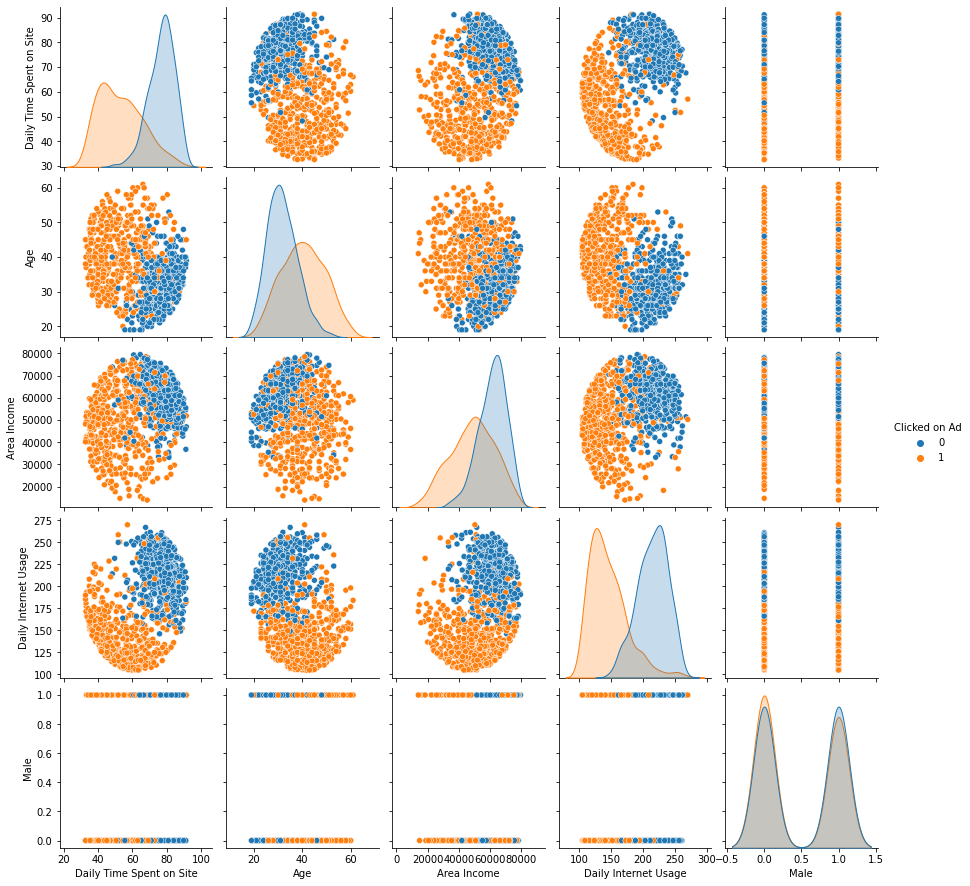

In [24]:
sns.pairplot(ad_data, hue='Clicked on Ad')

In [ ]:
sns.countplot(ad_data['Clicked on Ad'], hue = ad_data['Sex'])

<AxesSubplot:>

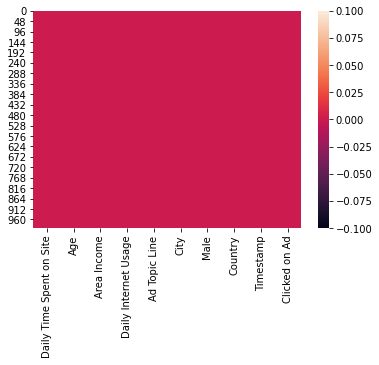

In [28]:
sns.heatmap(ad_data.isna())
#no NAs!

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Clicked on Ad', ylabel='Area Income'>

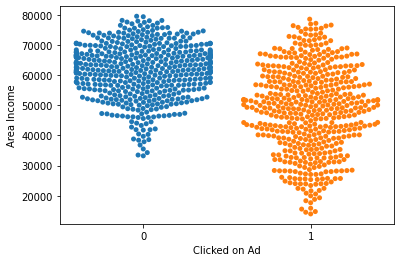

In [29]:
sns.swarmplot(data = ad_data, x= ad_data['Clicked on Ad'], y = ad_data['Area Income'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Clicked on Ad', ylabel='Age'>

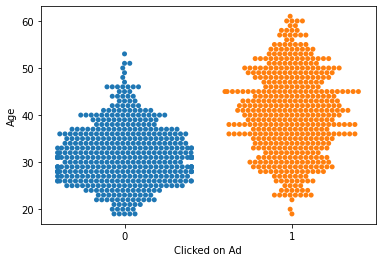

In [30]:
sns.swarmplot(data= ad_data, x = ad_data['Clicked on Ad'], y = ad_data['Age'])

In [31]:
ad_data['Ad Topic Line'].value_counts()




Proactive encompassing paradigm              1
Profit-focused dedicated utilization         1
Automated full-range Internet solution       1
Face-to-face even-keeled website             1
Configurable tertiary capability             1
                                            ..
Reactive local challenge                     1
Operative didactic Local Area Network        1
Upgradable multi-tasking initiative          1
Self-enabling asynchronous knowledge user    1
Switchable multi-state success               1
Name: Ad Topic Line, Length: 1000, dtype: int64

In [ ]:
ad_data['Country'].unique()

In [28]:
ad_data_no_ts.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Clicked on Ad,Date,Time
0,68.95,35,61.83390,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,0,2016-03-27,00:53:11
1,80.23,31,68.44185,193.77,Monitored national standardization,West Jodi,Male,Nauru,0,2016-04-04,01:39:02
2,69.47,26,59.78594,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,0,2016-03-13,20:35:42
3,74.15,29,54.80618,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,0,2016-01-10,02:31:19
4,68.37,35,73.88999,225.58,Robust logistical utilization,South Manuel,Female,Iceland,0,2016-06-03,03:36:18


### Converting Time to bins

In [25]:
#convert time to hours first
hours = pd.to_datetime(x_train['Time'], format='%H:%M:%S').dt.hour
#create bins
x_train['Time of Day'] = pd.cut(hours, bins = [0, 6, 12, 18, 24], include_lowest = True, labels = ['morning', 'afternoon', 'evening', 'night'])
#ad_data = ad_data.drop(['time_of_day'], axis = 'columns') #whoops added too many
x_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Timestamp,Date,Time,Time of Day
212,76.87,27,54.77477,235.35,Configurable fault-tolerant monitoring,Mcdonaldfort,Male,Kyrgyz Republic,2016-05-29 21:17:10,2016-05-29,21:17:10,night
692,66.26,47,14.54806,179.04,Optional full-range projection,Matthewtown,Male,Lebanon,2016-04-25 19:31:39,2016-04-25,19:31:39,night
527,59.61,21,60.63762,198.45,Future-proofed coherent budgetary management,Port James,Male,Cambodia,2016-04-06 05:55:43,2016-04-06,05:55:43,morning
565,79.97,26,61.74798,185.45,Down-sized explicit budgetary management,Port Maria,Male,Nepal,2016-01-08 19:38:45,2016-01-08,19:38:45,night
686,74.27,37,65.18097,247.05,Monitored executive architecture,Andrewmouth,Male,Burkina Faso,2016-01-31 09:57:34,2016-01-31,09:57:34,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
659,76.42,26,60.31519,223.16,Open-source optimizing parallelism,Brendaburgh,Male,Netherlands Antilles,2016-04-17 18:38:14,2016-04-17,18:38:14,evening
425,60.07,42,65.96337,120.75,Total user-facing hierarchy,South Vincentchester,Male,United Kingdom,2016-04-15 10:16:49,2016-04-15,10:16:49,afternoon
4,68.37,35,73.88999,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,2016-06-03,03:36:18,morning
807,53.22,44,44.30718,108.85,Horizontal client-server database,Port Aprilville,Female,United States Virgin Islands,2016-05-26 06:03:57,2016-05-26,06:03:57,morning


In [26]:
#convert time to hours first
hours_test = pd.to_datetime(x_test['Time'], format='%H:%M:%S').dt.hour
#create bins
x_test['Time of Day'] = pd.cut(hours_test, bins = [0, 6, 12, 18, 24], include_lowest = True, labels = ['morning', 'afternoon', 'evening', 'night'])
#ad_data = ad_data.drop(['time_of_day'], axis = 'columns') #whoops added too many
x_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Timestamp,Date,Time,Time of Day
610,32.91,37,51.69155,181.02,Future-proofed fresh-thinking conglomeration,Elizabethstad,Female,South Africa,2016-07-17 14:26:04,2016-07-17,14:26:04,evening
21,84.59,35,60.01557,226.54,Streamlined non-volatile analyzer,Lake Nicole,Male,Cameroon,2016-03-18 13:22:35,2016-03-18,13:22:35,evening
491,59.12,33,28.21003,124.54,Synergistic stable infrastructure,Silvaton,Female,Greece,2016-05-12 21:32:06,2016-05-12,21:32:06,night
792,56.56,26,68.78345,204.47,Compatible composite project,Port Jasmine,Male,Grenada,2016-02-03 22:11:13,2016-02-03,22:11:13,night
570,50.32,40,27.96460,125.65,Realigned intangible benchmark,Rochabury,Female,Yemen,2016-04-27 18:25:30,2016-04-27,18:25:30,evening
...,...,...,...,...,...,...,...,...,...,...,...,...
545,42.60,55,55.12165,168.29,Switchable analyzing encryption,Lake Ian,Female,Cambodia,2016-07-11 18:12:43,2016-07-11,18:12:43,evening
352,78.19,30,62.47599,228.81,Triple-buffered needs-based Local Area Network,Mollyport,Female,Libyan Arab Jamahiriya,2016-01-31 06:14:10,2016-01-31,06:14:10,morning
368,74.62,36,73.20715,217.79,Self-enabling even-keeled methodology,Lake Kurtmouth,Female,Rwanda,2016-04-04 08:19:54,2016-04-04,08:19:54,afternoon
626,85.77,27,52.26173,191.78,Implemented disintermediate attitude,South Brian,Male,Morocco,2016-04-09 23:26:42,2016-04-09,23:26:42,night


### Bin dates by Month

In [27]:
#convert to datetime first
month = pd.to_datetime(x_train['Date'])
#automatically bins 1-Jan, 2- Feb, etc.
x_train['Month'] = month.dt.month
x_train


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Timestamp,Date,Time,Time of Day,Month
212,76.87,27,54.77477,235.35,Configurable fault-tolerant monitoring,Mcdonaldfort,Male,Kyrgyz Republic,2016-05-29 21:17:10,2016-05-29,21:17:10,night,5
692,66.26,47,14.54806,179.04,Optional full-range projection,Matthewtown,Male,Lebanon,2016-04-25 19:31:39,2016-04-25,19:31:39,night,4
527,59.61,21,60.63762,198.45,Future-proofed coherent budgetary management,Port James,Male,Cambodia,2016-04-06 05:55:43,2016-04-06,05:55:43,morning,4
565,79.97,26,61.74798,185.45,Down-sized explicit budgetary management,Port Maria,Male,Nepal,2016-01-08 19:38:45,2016-01-08,19:38:45,night,1
686,74.27,37,65.18097,247.05,Monitored executive architecture,Andrewmouth,Male,Burkina Faso,2016-01-31 09:57:34,2016-01-31,09:57:34,afternoon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,76.42,26,60.31519,223.16,Open-source optimizing parallelism,Brendaburgh,Male,Netherlands Antilles,2016-04-17 18:38:14,2016-04-17,18:38:14,evening,4
425,60.07,42,65.96337,120.75,Total user-facing hierarchy,South Vincentchester,Male,United Kingdom,2016-04-15 10:16:49,2016-04-15,10:16:49,afternoon,4
4,68.37,35,73.88999,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,2016-06-03,03:36:18,morning,6
807,53.22,44,44.30718,108.85,Horizontal client-server database,Port Aprilville,Female,United States Virgin Islands,2016-05-26 06:03:57,2016-05-26,06:03:57,morning,5


In [28]:
#convert to datetime first
month_test = pd.to_datetime(x_test['Date'])
#automatically bins 1-Jan, 2- Feb, etc.
x_test['Month'] = month_test.dt.month
x_test


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Timestamp,Date,Time,Time of Day,Month
610,32.91,37,51.69155,181.02,Future-proofed fresh-thinking conglomeration,Elizabethstad,Female,South Africa,2016-07-17 14:26:04,2016-07-17,14:26:04,evening,7
21,84.59,35,60.01557,226.54,Streamlined non-volatile analyzer,Lake Nicole,Male,Cameroon,2016-03-18 13:22:35,2016-03-18,13:22:35,evening,3
491,59.12,33,28.21003,124.54,Synergistic stable infrastructure,Silvaton,Female,Greece,2016-05-12 21:32:06,2016-05-12,21:32:06,night,5
792,56.56,26,68.78345,204.47,Compatible composite project,Port Jasmine,Male,Grenada,2016-02-03 22:11:13,2016-02-03,22:11:13,night,2
570,50.32,40,27.96460,125.65,Realigned intangible benchmark,Rochabury,Female,Yemen,2016-04-27 18:25:30,2016-04-27,18:25:30,evening,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,42.60,55,55.12165,168.29,Switchable analyzing encryption,Lake Ian,Female,Cambodia,2016-07-11 18:12:43,2016-07-11,18:12:43,evening,7
352,78.19,30,62.47599,228.81,Triple-buffered needs-based Local Area Network,Mollyport,Female,Libyan Arab Jamahiriya,2016-01-31 06:14:10,2016-01-31,06:14:10,morning,1
368,74.62,36,73.20715,217.79,Self-enabling even-keeled methodology,Lake Kurtmouth,Female,Rwanda,2016-04-04 08:19:54,2016-04-04,08:19:54,afternoon,4
626,85.77,27,52.26173,191.78,Implemented disintermediate attitude,South Brian,Male,Morocco,2016-04-09 23:26:42,2016-04-09,23:26:42,night,4


In [36]:
#sns.countplot(ad_data['Month'], hue = ad_data['Clicked on Ad'])

In [37]:
#sns.countplot(ad_data['Time of Day'], hue = ad_data['Clicked on Ad'])

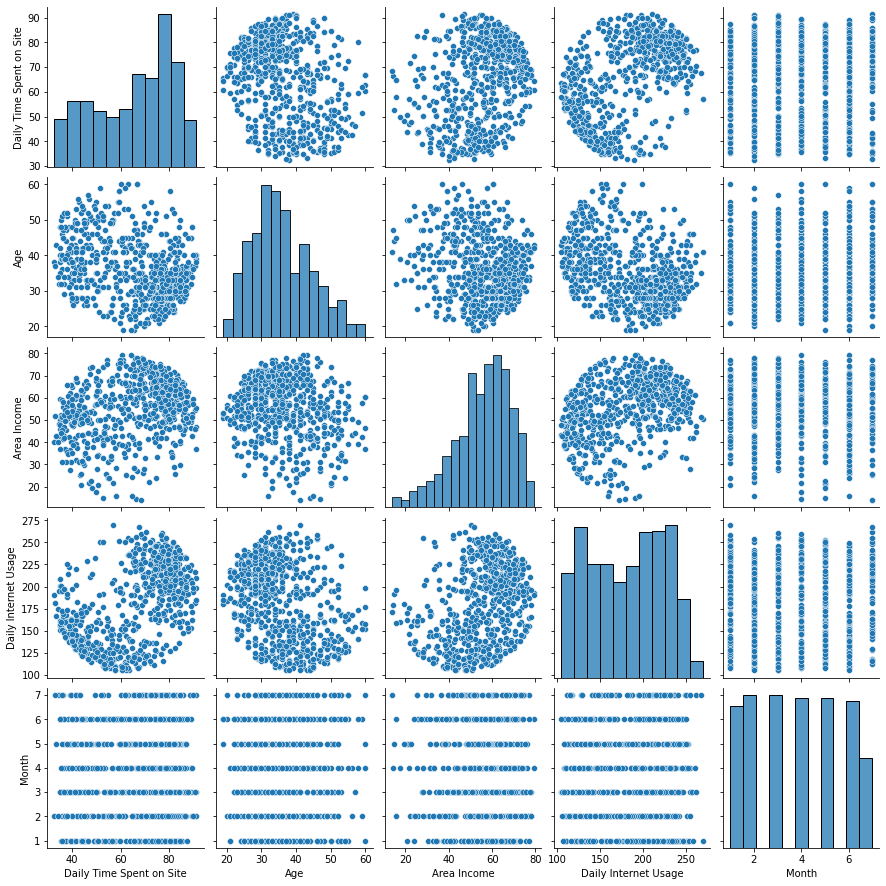

In [91]:
sns.pairplot(x_train)

### Binning country names by continent

In [29]:
#first need to convert names of countries into country codes & continent codes
#imported pycountry_convert in pip
import pycountry_convert as pcc
import pycountry as pc

In [30]:
#array needs to be in a list format to work and many country names are not official names

countries = x_train['Country'].to_list()
country_list = []
for name in countries:
    try:
        country = pc.countries.search_fuzzy(name)
        country_code = country[0].alpha_2
        country_list.append(country_code)
    except LookupError :
        country_list.append('None')
        
# column = ad_data['Country']
# get_continent(column)

In [31]:
#print(country_list)
type(country_list)
Code_array= np.array(country_list)
x_train['Country Code'] = Code_array

In [32]:
continent_list = []
for code in country_list:
    try:
        cont_code = pcc.country_alpha2_to_continent_code(code)
        continent_list.append(cont_code)
    except LookupError:
        continent_list.append('None')

In [33]:
Continent_array = np.array(continent_list)
x_train['Continent Code'] = Continent_array

In [34]:
x_train.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Timestamp,Date,Time,Time of Day,Month,Country Code,Continent Code
212,76.87,27,54.77477,235.35,Configurable fault-tolerant monitoring,Mcdonaldfort,Male,Kyrgyz Republic,2016-05-29 21:17:10,2016-05-29,21:17:10,night,5,KG,AS
692,66.26,47,14.54806,179.04,Optional full-range projection,Matthewtown,Male,Lebanon,2016-04-25 19:31:39,2016-04-25,19:31:39,night,4,LB,AS
527,59.61,21,60.63762,198.45,Future-proofed coherent budgetary management,Port James,Male,Cambodia,2016-04-06 05:55:43,2016-04-06,05:55:43,morning,4,KH,AS
565,79.97,26,61.74798,185.45,Down-sized explicit budgetary management,Port Maria,Male,Nepal,2016-01-08 19:38:45,2016-01-08,19:38:45,night,1,NP,AS
686,74.27,37,65.18097,247.05,Monitored executive architecture,Andrewmouth,Male,Burkina Faso,2016-01-31 09:57:34,2016-01-31,09:57:34,afternoon,1,BF,AF


In [35]:
countries_test = x_test['Country'].to_list()
country_list_test = []
for name in countries_test:
    try:
        country = pc.countries.search_fuzzy(name)
        country_code = country[0].alpha_2
        country_list_test.append(country_code)
    except LookupError :
        country_list_test.append('None')

In [36]:
Code_array_test= np.array(country_list_test)
x_test['Country Code'] = Code_array_test

In [37]:
continent_list_test = []
for code in country_list_test:
    try:
        cont_code = pcc.country_alpha2_to_continent_code(code)
        continent_list_test.append(cont_code)
    except LookupError:
        continent_list_test.append('None')

In [38]:
Continent_array_test = np.array(continent_list_test)
x_test['Continent Code'] = Continent_array_test

In [39]:
x_test.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Timestamp,Date,Time,Time of Day,Month,Country Code,Continent Code
610,32.91,37,51.69155,181.02,Future-proofed fresh-thinking conglomeration,Elizabethstad,Female,South Africa,2016-07-17 14:26:04,2016-07-17,14:26:04,evening,7,ZA,AF
21,84.59,35,60.01557,226.54,Streamlined non-volatile analyzer,Lake Nicole,Male,Cameroon,2016-03-18 13:22:35,2016-03-18,13:22:35,evening,3,CM,AF
491,59.12,33,28.21003,124.54,Synergistic stable infrastructure,Silvaton,Female,Greece,2016-05-12 21:32:06,2016-05-12,21:32:06,night,5,GR,EU
792,56.56,26,68.78345,204.47,Compatible composite project,Port Jasmine,Male,Grenada,2016-02-03 22:11:13,2016-02-03,22:11:13,night,2,GD,NA
570,50.32,40,27.96460,125.65,Realigned intangible benchmark,Rochabury,Female,Yemen,2016-04-27 18:25:30,2016-04-27,18:25:30,evening,4,YE,AS


In [40]:
print(x_test['Continent Code'].value_counts())
print(x_train['Continent Code'].value_counts())

EU      73
AS      64
AF      61
NA      52
OC      29
None    27
SA      24
Name: Continent Code, dtype: int64
AS      152
EU      138
AF      133
NA       97
OC       71
SA       40
None     36
AN        3
Name: Continent Code, dtype: int64


### Bin Income

In [41]:
print('Min area income is:' , x_train['Area Income'].min())
print('Median area income is:' , x_train['Area Income'].median())
print('Max area income is:' , x_train['Area Income'].max())
print(x_train.describe())

Min area income is: 14.54806
Median area income is: 57.472300000000004
Max area income is: 79.4848
       Daily Time Spent on Site         Age  Area Income  \
count                670.000000  670.000000   670.000000   
mean                  65.153299   36.064179    55.540010   
std                   15.892800    8.874329    12.871044   
min                   32.600000   19.000000    14.548060   
25%                   51.635000   29.000000    48.485055   
50%                   68.665000   35.000000    57.472300   
75%                   78.730000   42.000000    65.769208   
max                   91.430000   61.000000    79.484800   

       Daily Internet Usage       Month  
count            670.000000  670.000000  
mean             180.344821    3.850746  
std               43.999922    1.945089  
min              105.040000    1.000000  
25%              138.350000    2.000000  
50%              184.130000    4.000000  
75%              217.807500    6.000000  
max              269.960

In [42]:
print(x_test.describe())

       Daily Time Spent on Site         Age  Area Income  \
count                330.000000  330.000000   330.000000   
mean                  64.689364   35.896970    53.903616   
std                   15.793252    8.614771    14.413701   
min                   32.910000   19.000000    13.996500   
25%                   50.540000   29.000000    44.285782   
50%                   67.805000   35.000000    56.682485   
75%                   78.185000   41.000000    64.807335   
max                   91.370000   60.000000    78.520990   

       Daily Internet Usage       Month  
count            330.000000  330.000000  
mean             179.300212    3.748485  
std               43.761834    1.890726  
min              104.780000    1.000000  
25%              140.647500    2.000000  
50%              181.065000    4.000000  
75%              219.535000    5.000000  
max              259.760000    7.000000  


In [43]:
Income = x_train['Area Income']
x_train['Income Bins'] = pd.cut(Income, bins = [13, 47, 57, 65, 80], labels = ['low', 'low-mid', 'high-mid', 'high'])


In [44]:
Income_test = x_test['Area Income']
x_test['Income Bins'] = pd.cut(Income_test, bins = [13, 47, 57, 65, 80], labels = ['low', 'low-mid', 'high-mid', 'high'])


### Bin Ages

In [45]:
print('Min age is:' , ad_data['Age'].min())
print('Median age is:' , ad_data['Age'].median())
print('Max age is:' , ad_data['Age'].max())

Min age is: 19
Median age is: 35.0
Max age is: 61


In [46]:
Age = x_train['Age']
x_train['Age Bins'] = pd.cut(Age, bins = [18, 30, 36, 43, 62], labels = ['youngest', 'younger-mid', 'older-mid', 'oldest'])



In [47]:
Age_test = x_test['Age']
x_test['Age Bins'] = pd.cut(Age_test, bins = [18, 30, 36, 43, 62], labels = ['youngest', 'younger-mid', 'older-mid', 'oldest'])



### Bin Time Online

In [48]:
print('Min time spent online is:' , ad_data['Daily Internet Usage'].min())
print('Median time spent online is:' , ad_data['Daily Internet Usage'].median())
print('Max time spent online is:' , ad_data['Daily Internet Usage'].max())

Min time spent online is: 104.78
Median time spent online is: 183.13
Max time spent online is: 269.96


In [49]:
Time_Online = x_train['Daily Internet Usage']
x_train['Time_Online_Bins'] = pd.cut(Time_Online, bins = [104, 140, 184, 220, 270], labels = ['least-time', 'middle-time', 'more-time', 'most-time'])



In [50]:
Time_Online_test = x_test['Daily Internet Usage']
x_test['Time_Online_Bins'] = pd.cut(Time_Online_test, bins = [104, 140, 184, 220, 270], labels = ['least-time', 'middle-time', 'more-time', 'most-time'])


### Bin Time on Site

In [51]:
print('Min time spent on site is:' , ad_data['Daily Time Spent on Site'].min())
print('Median time spent on site is:' , ad_data['Daily Time Spent on Site'].median())
print('Max time spent on site is:' , ad_data['Daily Time Spent on Site'].max())

Min time spent on site is: 32.6
Median time spent on site is: 68.215
Max time spent on site is: 91.43


In [52]:
Time_On_Site = x_train['Daily Time Spent on Site']
x_train['Time_On_Site_Bins'] = pd.cut(Time_On_Site, bins = [32, 52, 69, 79, 92], labels = ['least-time', 'middle-time', 'more-time', 'most-time'])


In [53]:
Time_On_Site_test = x_test['Daily Time Spent on Site']
x_test['Time_On_Site_Bins'] = pd.cut(Time_On_Site_test, bins = [32, 52, 69, 79, 92], labels = ['least-time', 'middle-time', 'more-time', 'most-time'])


In [54]:
train_features = x_train.drop(['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Country', 'Timestamp', 'Date', 'Time', 'Country Code', 'Continent Code'], axis = 'columns')

train_features.head(2)

#Drop country and city columns since the


,Sex,Time of Day,Month,Income Bins,Age Bins,Time_Online_Bins,Time_On_Site_Bins
212,Male,night,5,low-mid,youngest,most-time,more-time
692,Male,night,4,low,oldest,middle-time,middle-time


In [144]:
test_features = x_test.drop(['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Country', 'Timestamp', 'Date', 'Time', 'Country Code', 'Continent Code'], axis = 'columns')
test_features.head(2)


,Sex,Time of Day,Month,Income Bins,Age Bins,Time_Online_Bins,Time_On_Site_Bins
610,Female,evening,7,low-mid,older-mid,middle-time,least-time
21,Male,evening,3,high-mid,younger-mid,most-time,most-time


### One Hot Encode

In [145]:
train_labels = y_train
test_labels = y_test

print(train_labels.shape, train_features.shape)
print(test_labels.shape, test_features.shape)

(670,) (670, 7)
(330,) (330, 7)


In [151]:
train_features_ohe = pd.get_dummies(train_features)
test_features_ohe = pd.get_dummies(test_features)

In [152]:
print(train_features_ohe.shape, test_features_ohe.shape)
print(train_labels.shape, test_labels.shape)
#print(train_features['Continent Code'].value_counts())

(670, 17) (330, 23)
(670,) (330,)


,Month,Sex_Female,Sex_Male,Time of Day_morning,Time of Day_afternoon,Time of Day_evening,Time of Day_night,Income Bins_low,Income Bins_low-mid,Income Bins_high-mid,...,Age Bins_older-mid,Age Bins_oldest,Time_Online_Bins_least-time,Time_Online_Bins_middle-time,Time_Online_Bins_more-time,Time_Online_Bins_most-time,Time_On_Site_Bins_least-time,Time_On_Site_Bins_middle-time,Time_On_Site_Bins_more-time,Time_On_Site_Bins_most-time
610,7,1,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
21,3,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
491,5,1,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
792,2,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
570,4,1,0,0,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0


### Think I may have over-correlated!

In [155]:
train_features_oc = x_train.drop(['Age', 'Area Income', 'Ad Topic Line', 'City', 'Country', 'Timestamp', 'Date', 'Time', 'Country Code', 'Continent Code', 'Time_Online_Bins', 'Time_On_Site_Bins'], axis = 'columns')

train_features_oc.head(2)


,Daily Time Spent on Site,Daily Internet Usage,Sex,Time of Day,Month,Income Bins,Age Bins
212,76.87,235.35,Male,night,5,low-mid,youngest
692,66.26,179.04,Male,night,4,low,oldest


In [156]:
test_features_oc = x_test.drop(['Age', 'Area Income', 'Ad Topic Line', 'City', 'Country', 'Timestamp', 'Date', 'Time', 'Country Code', 'Continent Code', 'Time_Online_Bins', 'Time_On_Site_Bins'], axis = 'columns')

test_features_oc.head(2)


,Daily Time Spent on Site,Daily Internet Usage,Sex,Time of Day,Month,Income Bins,Age Bins
610,32.91,181.02,Female,evening,7,low-mid,older-mid
21,84.59,226.54,Male,evening,3,high-mid,younger-mid


In [157]:
train_labels = y_train
test_labels = y_test

print(train_labels.shape, train_features_oc.shape)
print(test_labels.shape, test_features_oc.shape)

(670,) (670, 7)
(330,) (330, 7)


In [158]:
train_features_oc_ohe = pd.get_dummies(train_features_oc)
test_features_oc_ohe = pd.get_dummies(test_features_oc)

In [159]:
print(train_features_oc_ohe.shape, test_features_oc_ohe.shape)
print(train_labels.shape, test_labels.shape)

(670, 17) (330, 17)
(670,) (330,)


### Descision Tree Classifier

In [160]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier()

dtclf = dtclf.fit(train_features_oc_ohe, train_labels)

In [161]:
predict_labels = dtclf.predict(test_features_oc_ohe)

In [162]:
from sklearn import metrics

accuracy = metrics.accuracy_score(test_labels, predict_labels)

print("Accuracy is:", accuracy)

Accuracy is: 0.9272727272727272


In [164]:
print("DTCLF Accuracy is:", dtclf.score(test_features_oc_ohe, test_labels))
#this is just to see if the score is the same between different methods

DTCLF Accuracy is: 0.9272727272727272


In [165]:
print("Depth of tree:", dtclf.get_depth())
print("Number of leaves:", dtclf.get_n_leaves())
print("Number of nodes:", dtclf.tree_.node_count)
#I can do better than this

Depth of tree: 10
Number of leaves: 38
Number of nodes: 75


In [166]:
print("Parameters:", dtclf.get_params(deep= True))

Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


### Now to Prune...using minimal cost complexity pruning

Chose to use minimal cost complexity to prune because it uses the "weakest link" method. This method takes the alpha values and determines effectiveness, then removes the node with the least effective alpha first. As alpha goes up, more of the tree is pruned so you get less nodes and more impurity. 

In [167]:
cc_pruning_path = dtclf.cost_complexity_pruning_path(train_features_ohe, train_labels)
print("Alpha Values:\n", cc_pruning_path)

Alpha Values:
 {'ccp_alphas': array([0.        , 0.00137773, 0.00138593, 0.00144864, 0.00145108,
       0.00146787, 0.00149194, 0.00150551, 0.00151311, 0.00199005,
       0.00223881, 0.00252583, 0.00269071, 0.00288557, 0.00326549,
       0.00335821, 0.00370455, 0.00401327, 0.00432603, 0.00918969,
       0.08284822, 0.32888957]), 'impurities': array([0.        , 0.00275545, 0.00552731, 0.00842459, 0.01132674,
       0.01719821, 0.02018209, 0.02620412, 0.02923035, 0.0312204 ,
       0.03345921, 0.03851087, 0.0438923 , 0.04677787, 0.05004336,
       0.05340157, 0.05710612, 0.06111939, 0.06977145, 0.08815083,
       0.17099904, 0.49988862])}


In [168]:
ccp_alphas, impurities = cc_pruning_path.ccp_alphas, cc_pruning_path.impurities
print(ccp_alphas,"\n\n", impurities)

[0.         0.00137773 0.00138593 0.00144864 0.00145108 0.00146787
 0.00149194 0.00150551 0.00151311 0.00199005 0.00223881 0.00252583
 0.00269071 0.00288557 0.00326549 0.00335821 0.00370455 0.00401327
 0.00432603 0.00918969 0.08284822 0.32888957] 

 [0.         0.00275545 0.00552731 0.00842459 0.01132674 0.01719821
 0.02018209 0.02620412 0.02923035 0.0312204  0.03345921 0.03851087
 0.0438923  0.04677787 0.05004336 0.05340157 0.05710612 0.06111939
 0.06977145 0.08815083 0.17099904 0.49988862]


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

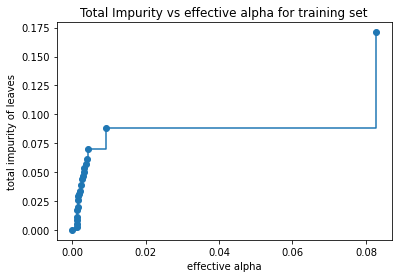

In [169]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [170]:
#retrain with only effective alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(train_features_ohe, train_labels)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.32888957380510253


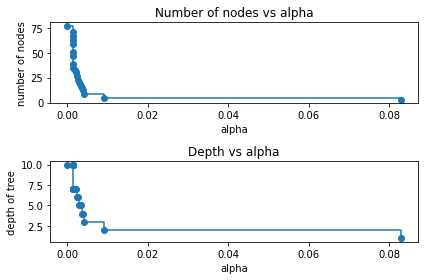

<Figure size 1440x1440 with 0 Axes>

In [171]:
#drop the last alpha b/c it is only a 1 node tree

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)

ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
plt.figure(figsize = (20, 20))
fig.tight_layout()


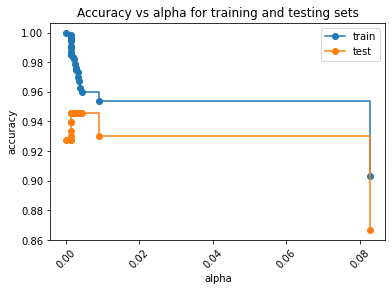

In [173]:
train_scores = [clf.score(train_features_oc_ohe, train_labels) for clf in clfs]
test_scores = [clf.score(test_features_oc_ohe, test_labels) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.xticks(rotation = '45')
plt.show()


### Trim that tree

In [174]:
#Retraining with 0.005 alpha to maximize accuracy in testing and training.

dtclfa = DecisionTreeClassifier(ccp_alpha= 0.005)

dtclfa = dtclfa.fit(train_features_ohe, train_labels)

In [177]:
predict_labels_alpha = dtclfa.predict(test_features_oc_ohe)

print("Accuracy with modified alpha is:", dtclfa.score(test_features_oc_ohe, test_labels))
print("Depth of tree with modified alpha is:", dtclfa.get_depth())
print("Number of leaves with modified alpha is:", dtclfa.get_n_leaves())

Accuracy with modified alpha is: 0.9454545454545454
Depth of tree with modified alpha is: 3
Number of leaves with modified alpha is: 5


### Checking out Feature Importance

In [178]:
feature_importance = dtclfa.feature_importances_
feature_importances = pd.Series(feature_importance)

feature_names = np.array(train_features_oc_ohe.columns)
feature_name = pd.Series(feature_names)

name_importance = pd.concat([feature_name, feature_importances], axis = 1)
name_importance = name_importance.rename(columns = {0:'Feature', 1:'Importance'})
sorted_name_importance = name_importance.sort_values(by = 'Importance', ascending= False)
sorted_name_importance

,Feature,Importance
1,Daily Internet Usage,0.787311
0,Daily Time Spent on Site,0.212689
9,Income Bins_low,0.000000
15,Age Bins_older-mid,0.000000
14,Age Bins_younger-mid,0.000000
13,Age Bins_youngest,0.000000
12,Income Bins_high,0.000000
11,Income Bins_high-mid,0.000000
10,Income Bins_low-mid,0.000000
8,Time of Day_night,0.000000


### Visualize the Tree

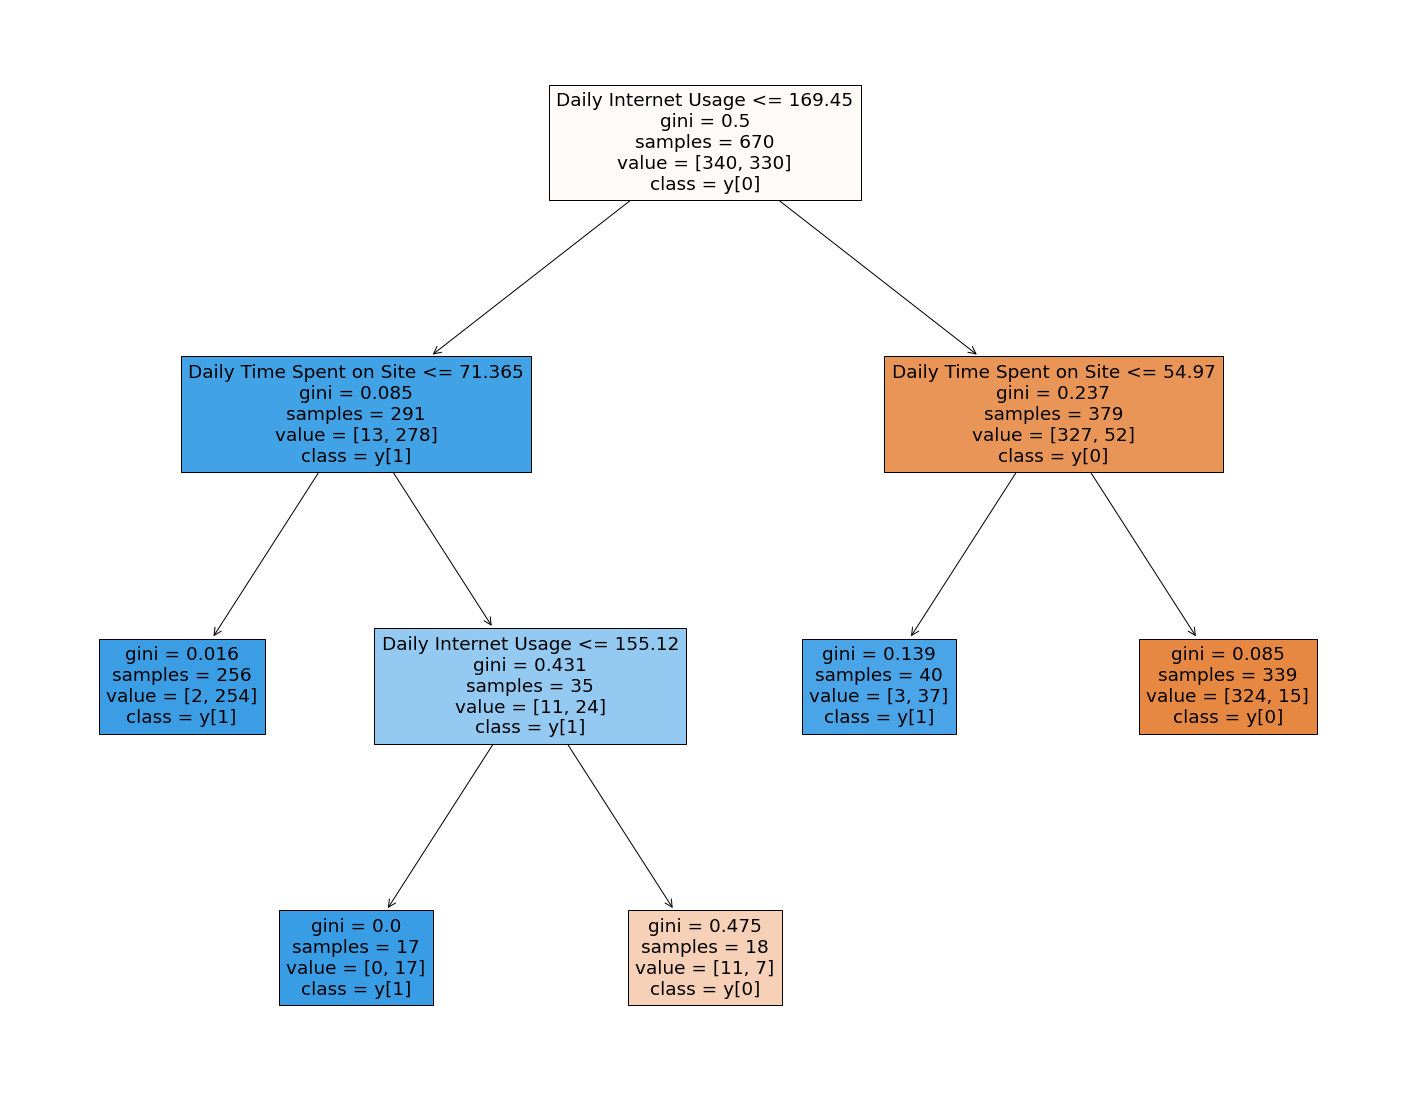

In [179]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
tree_viz = plot_tree(dtclfa,
              feature_names=train_features_oc_ohe.columns,
              class_names=True,
              filled=True)


### Lets make some NLP clusters!

In [49]:
type(['Ad Topic Line'])
Ad_Topic_list = ad_data['Ad Topic Line'].tolist()
print(Ad_Topic_list[0:10])

['Cloned 5thgeneration orchestration', 'Monitored national standardization', 'Organic bottom-line service-desk', 'Triple-buffered reciprocal time-frame', 'Robust logistical utilization', 'Sharable client-driven software', 'Enhanced dedicated support', 'Reactive local challenge', 'Configurable coherent function', 'Mandatory homogeneous architecture']


In [51]:
#Use KMeans clustering and NLP to cluster the Ad Topic Lines

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')


import string
def text_pre_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    4. Remove words
    '''
    stemmer = WordNetLemmatizer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
    return [stemmer.lemmatize(word) for word in nopunc]

#testing the function with a sample text#
sample_text = "'Cloned 5thgeneration orchestration', 'Monitored national standardization', 'Organic bottom-line service-desk'"
print(text_pre_process(sample_text))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/corissa.mantooth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/corissa.mantooth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['cloned', 'thgeneration', 'orchestration', 'monitored', 'national', 'standardization', 'organic', 'bottomline', 'servicedesk']
